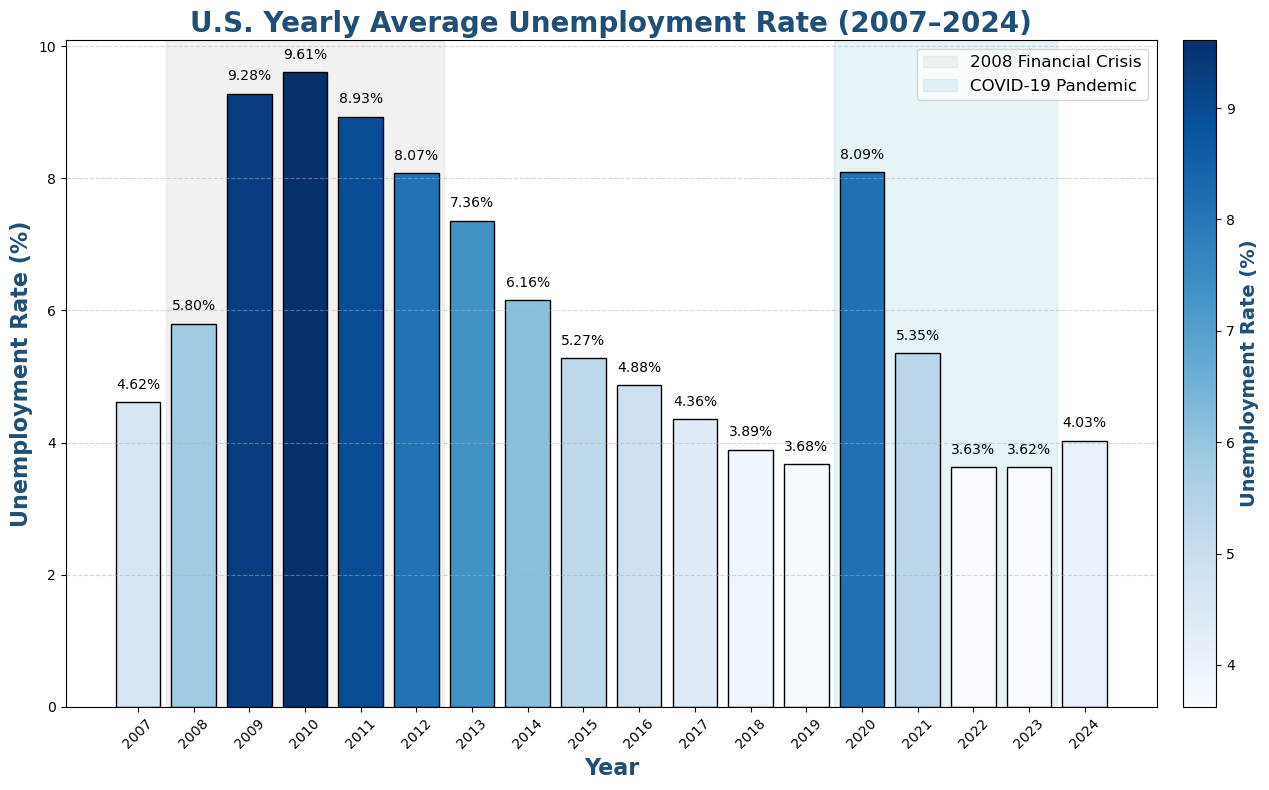

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

unemployment_data = pd.read_csv("../Data/UNRATE.csv")


# Convert observation_date to datetime
unemployment_data["observation_date"] = pd.to_datetime(unemployment_data["observation_date"])

# Filter for relevant time periods and explicitly create a copy
filtered_data = unemployment_data[
    (unemployment_data["observation_date"] >= "2007-01-01") & 
    (unemployment_data["observation_date"] <= "2024-12-31")
].copy()

# Safely add the 'year' column
filtered_data["year"] = filtered_data["observation_date"].dt.year

# Create yearly averages
yearly_averages = filtered_data.groupby("year")["UNRATE"].mean().reset_index()

# Normalize unemployment rates for color intensity (min-max scaling)
norm = plt.Normalize(yearly_averages["UNRATE"].min(), yearly_averages["UNRATE"].max())
colors = plt.cm.Blues(norm(yearly_averages["UNRATE"]))

# Crisis periods with differentiated colors
crisis_periods = [
    {"label": "2008 Financial Crisis", "start": 2008, "end": 2012, "color": "lightgrey"},
    {"label": "COVID-19 Pandemic", "start": 2020, "end": 2023, "color": "lightblue"}
]

# Create the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Add background shading for crisis periods
for crisis in crisis_periods:
    ax.axvspan(crisis["start"] - 0.5, crisis["end"] + 0.5, color=crisis["color"], alpha=0.3, label=crisis["label"])

# Plot bars
bars = ax.bar(
    yearly_averages["year"], 
    yearly_averages["UNRATE"], 
    color=colors, 
    edgecolor="black"
)

# Add annotations for unemployment rates
for bar, rate in zip(bars, yearly_averages["UNRATE"]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f"{rate:.2f}%", ha='center', fontsize=10)

# Add text annotations for crisis labels
for crisis in crisis_periods:
    mid = (crisis["start"] + crisis["end"]) / 2
    ax.annotate(
        crisis["label"], 
        xy=(mid, max(yearly_averages["UNRATE"]) + 1), 
        ha="center", 
        fontsize=12, 
        fontweight="bold", 
        color=crisis["color"],
        arrowprops=dict(arrowstyle="|-|", color=crisis["color"], lw=1.5),
        xytext=(mid, max(yearly_averages["UNRATE"]) + 2)
    )

# Add color bar for explanation
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Unemployment Rate (%)", fontsize=14, fontweight="bold", color="#1f4e79")

# Graph details
ax.set_title("U.S. Yearly Average Unemployment Rate (2007–2024)", fontsize=20, fontweight="bold", color="#1f4e79")
ax.set_xlabel("Year", fontsize=16, fontweight="bold", color="#1f4e79")
ax.set_ylabel("Unemployment Rate (%)", fontsize=16, fontweight="bold", color="#1f4e79")
ax.set_xticks(yearly_averages["year"])
ax.set_xticklabels(yearly_averages["year"], rotation=45)
ax.grid(axis='y', linestyle="--", alpha=0.5)

# Add legend for crisis shading
ax.legend(loc="upper right", fontsize=12, frameon=True)
plt.savefig("UNEMPLOYMENT.png", dpi=300, bbox_inches='tight')
# Adjust layout
plt.tight_layout()

plt.show()
